## **Mini Projet: Analyse et Visualisation des Données de l’Enquête Nationale sur l’Emploi**

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes # Pour la Partie 3
import numpy as np # Pour la Partie 3

# Charger le jeu de données
file_path = 'Data_T4_2023.csv'
df = pd.read_csv(file_path)

/tmp/ipython-input-4093954855.py:9: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## Partie 1 : Exploration des Données
### 1. Dimension, nombre de lignes et de colonnes

In [ ]:
# 1. Dimension du jeu de données
dimension = df.shape
n_lignes = dimension[0]
n_colonnes = dimension[1]

print(f"Dimension du jeu de données (lignes, colonnes) : {dimension}")
print(f"Nombre de lignes : {n_lignes}")
print(f"Nombre de colonnes : {n_colonnes}")

Dimension du jeu de données (lignes, colonnes) : (67444, 41)
Nombre de lignes : 67444
Nombre de colonnes : 41


### 2. Noms des colonnes et types de données

In [ ]:
# 2. Noms des colonnes et leurs types de données
print("\nTypes de données par colonne :")
print(df.dtypes)


Types de données par colonne :
Y_Quarter                     int64
Year                          int64
Quarter                       int64
Region                       object
HH_Id                         int64
Member_Number                 int64
Relationship                 object
Gender                       object
Age                           int64
Civil_Status                 object
Attend_edu_trai_cycle        object
Edu_cycle                    object
Edu_Year                    float64
Literacy                     object
Educa_Level                  object
Edu_Comp_Year               float64
Edu_Degr_Diploma             object
Year_Of_Diploma             float64
Unstructured_Educational     object
Paid_Work_7d                 object
Unpaid_Work                  object
Agric_Work                   object
Sale_or_Self_cons            object
Reason_Not_Work              object
Look_for_Work                object
Procedure_Look               object
Reason_Not_Looking           obj

### 3. Afficher les 5 premières lignes

In [ ]:
# 3. Afficher les 5 premières lignes des données
print("\n5 premières lignes du DataFrame :")
print(df.head())


5 premières lignes du DataFrame :
   Y_Quarter  Year  Quarter       Region  HH_Id  Member_Number  \
0      20234  2023        4  Grand Tunis      1              1   
1      20234  2023        4  Grand Tunis      2              4   
2      20234  2023        4  Grand Tunis      2              3   
3      20234  2023        4  Grand Tunis      2              1   
4      20234  2023        4  Grand Tunis      2              2   

            Relationship    Gender  Age Civil_Status  ... Occupation  \
0  1- Head of the family  2.Female   90      3.Widow  ...        NaN   
1    3- Son/daughter (1)    1.Male   15     1.Single  ...        NaN   
2    3- Son/daughter (1)  2.Female   10     1.Single  ...        NaN   
3  1- Head of the family    1.Male   46    2.Married  ...    42240.0   
4      2-       Wife (1)  2.Female   46    2.Married  ...        NaN   

  Status_Work  Social_Fund Environment Sector_of_Activity_2  \
0         NaN          NaN     1.Urban                  NaN   
1        

### 4. Afficher les 5 dernières lignes

In [ ]:
# 4. Afficher les 5 dernières lignes des données
print("\n5 dernières lignes du DataFrame :")
print(df.tail())


5 dernières lignes du DataFrame :
       Y_Quarter  Year  Quarter      Region  HH_Id  Member_Number  \
67439      20234  2023        4  South West   2200              1   
67440      20234  2023        4  South West   2200              2   
67441      20234  2023        4  South West   2200              3   
67442      20234  2023        4  South West   2201              2   
67443      20234  2023        4  South West   2201              1   

                Relationship    Gender  Age Civil_Status  ... Occupation  \
67439  1- Head of the family  2.Female   65      3.Widow  ...        NaN   
67440    3- Son/daughter (1)    1.Male   36     1.Single  ...        NaN   
67441    3- Son/daughter (1)    1.Male   43     1.Single  ...        NaN   
67442     7-  father (wife)1  2.Female   40   4.Divorced  ...        NaN   
67443  1- Head of the family  2.Female   52     1.Single  ...        NaN   

      Status_Work  Social_Fund Environment Sector_of_Activity_2  \
67439         NaN         

### 5. Vérifier s'il y a des valeurs manquantes

In [ ]:
# 5. Vérifier s'il y a des valeurs manquantes (NaN)
print("\nNombre de valeurs manquantes par colonne :")
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes[valeurs_manquantes > 0])

if (df.isnull().sum().sum() == 0):
    print("\nLe jeu de données ne contient aucune valeur manquante.")


Nombre de valeurs manquantes par colonne :
Attend_edu_trai_cycle        2237
Edu_cycle                   48901
Edu_Year                    50985
Literacy                    20771
Educa_Level                 30448
Edu_Comp_Year               30801
Edu_Degr_Diploma            31384
Year_Of_Diploma             57316
Unstructured_Educational    31199
Paid_Work_7d                16266
Unpaid_Work                 34860
Agric_Work                  67216
Sale_or_Self_cons           67242
Reason_Not_Work             35035
Look_for_Work               35363
Procedure_Look              63661
Reason_Not_Looking          39145
Desire_to_Work              39020
Ready_Available             62439
Class_Activity              16353
Workplace                   65486
Occupation                  48472
Status_Work                 48465
Social_Fund                 48911
Sector_of_Activity_2        48472
Sector_of_Activity          48475
Diploma_Agg                 16206
High_Diploma                16206
dtyp

### 6. Vérifier s'il y a des valeurs redondantes

In [ ]:
# 6. Vérifier s'il y a des lignes complètement dupliquées
n_doublons = df.duplicated().sum()

print(f"\nNombre de lignes complètement redondantes (dupliquées) : {n_doublons}")

if n_doublons > 0:
    print("Il y a des lignes dupliquées dans le dataset.")
else:
    print("Le jeu de données ne contient pas de lignes complètement dupliquées.")


Nombre de lignes complètement redondantes (dupliquées) : 0
Le jeu de données ne contient pas de lignes complètement dupliquées.


## Partie 2 : Préparation et Analyse des Données : chomeurs_volontaires

### 7. Valeurs uniques dans Desire_to_Work

In [ ]:
# 7. Afficher toutes les valeurs uniques présentes dans la colonne Desire_to_Work
valeurs_uniques_desire = df['Desire_to_Work'].unique()
print("\nValeurs uniques dans la colonne 'Desire_to_Work' :")
print(valeurs_uniques_desire)


Valeurs uniques dans la colonne 'Desire_to_Work' :
['2.No' nan '1.Yes']


### 8. Fréquence d'occurrence de chaque valeur

In [ ]:
# 8. Afficher la fréquence d'occurrence de chaque valeur unique de la colonne Desire_to_Work
frequence_desire = df['Desire_to_Work'].value_counts(dropna=False) # dropna=False inclut les NaN
print("\nFréquence d'occurrence de chaque valeur dans 'Desire_to_Work' :")
print(frequence_desire)


Fréquence d'occurrence de chaque valeur dans 'Desire_to_Work' :
Desire_to_Work
NaN      39020
2.No     27076
1.Yes     1348
Name: count, dtype: int64


### 9. Changement des valeurs de Desire_to_Work

In [ ]:
# 9. Changez les valeurs de la colonne Desire_to_Work
# Les valeurs uniques montrent qu'on doit mapper '1.Yes' à 'Yes' et '2.No' à 'No'.
df['Desire_to_Work'] = df['Desire_to_Work'].replace({'1.Yes': 'Yes', '2.No': 'No'})

### 10. Vérification du changement (5 premières lignes)

In [ ]:
# 10. Affichez ensuite les 5 premières lignes du DataFrame pour vérifier le changement
print("\n5 premières lignes après le changement des valeurs 'Desire_to_Work' :")
print(df.head()[['Desire_to_Work']])


5 premières lignes après le changement des valeurs 'Desire_to_Work' :
  Desire_to_Work
0             No
1             No
2            NaN
3            NaN
4            NaN


### 11. Remplacement des valeurs manquantes

In [ ]:
# 11. Remplacez les valeurs manquantes (NaN) de la colonne Desire_to_Work par 'Not specified'
df['Desire_to_Work'].fillna('Not specified', inplace=True)

# Afficher les 5 premières lignes pour vérifier le changement (y compris les NaN)
print("\n5 premières lignes après le remplacement des NaN dans 'Desire_to_Work' :")
print(df.head()[['Desire_to_Work']])

# Vérification des fréquences pour s'assurer que 'Not specified' est bien là
print("\nFréquence d'occurrence après remplacement des NaN :")
print(df['Desire_to_Work'].value_counts(dropna=False))


5 premières lignes après le remplacement des NaN dans 'Desire_to_Work' :
  Desire_to_Work
0             No
1             No
2  Not specified
3  Not specified
4  Not specified

Fréquence d'occurrence après remplacement des NaN :
Desire_to_Work
Not specified    39020
No               27076
Yes               1348
Name: count, dtype: int64


/tmp/ipython-input-2644864842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Desire_to_Work'].fillna('Not specified', inplace=True)


### 12. Extraction des "chômeurs volontaires"
L'énoncé demande : individus âgés entre 25 et 29 ans inclus et qui ne souhaitent pas travailler (Desire_to_Work = No).

In [ ]:
# 12. Extrayez les individus âgés entre 25 et 29 ans inclus et qui ne souhaitent pas travailler
chomeurs_volontaires = df[
    (df['Age'] >= 25) &
    (df['Age'] <= 29) &
    (df['Desire_to_Work'] == 'No')
]

# Colonnes à enregistrer
colonnes_cibles =['Age', 'Civil_Status', 'Environment', 'Desire_to_Work',
                   'Region', 'Gender', 'Educa_Level']

# Créer le DataFrame final pour l'enregistrement
chomeurs_volontaires_final = chomeurs_volontaires[colonnes_cibles]

# Enregistrer dans un fichier CSV
output_file = 'chomeurs_volontaires.csv'
chomeurs_volontaires_final.to_csv(output_file, index=False)

print(f"\nDataFrame 'chomeurs_volontaires' créé avec {len(chomeurs_volontaires_final)} individus et enregistré dans '{output_file}'.")
print("\nAperçu des données enregistrées :")
print(chomeurs_volontaires_final.head())


DataFrame 'chomeurs_volontaires' créé avec 919 individus et enregistré dans 'chomeurs_volontaires.csv'.

Aperçu des données enregistrées :
     Age Civil_Status Environment Desire_to_Work       Region    Gender  \
210   27    2.Married     1.Urban             No  Grand Tunis  2.Female   
263   27    2.Married     1.Urban             No  Grand Tunis  2.Female   
319   29     1.Single     1.Urban             No  Grand Tunis  2.Female   
372   28    2.Married     1.Urban             No  Grand Tunis  2.Female   
398   29    2.Married     1.Urban             No  Grand Tunis  2.Female   

                   Educa_Level  
210             5.Basic school  
263             5.Basic school  
319             5.Basic school  
372  7.Public Higher Education  
398   6.Secondary School (New)  


### 13. Répartition selon le statut civil (Civil_Status)

In [ ]:
# 13. Calculez la répartition des individus selon leur statut civil (Civil_Status)
repartition_civil_status = chomeurs_volontaires_final['Civil_Status'].value_counts(dropna=False)
print("\nRépartition du statut civil dans 'chomeurs_volontaires.csv' :")
print(repartition_civil_status)


Répartition du statut civil dans 'chomeurs_volontaires.csv' :
Civil_Status
2.Married     474
1.Single      432
4.Divorced      9
3.Widow         4
Name: count, dtype: int64


### 14. Environnements préférés (Environment)

*   Élément de liste
*   Élément de liste



In [ ]:
# 14. Identifiez les environnements préférés (Environment) en comptant les occurrences
repartition_environment = chomeurs_volontaires_final['Environment'].value_counts(dropna=False)
print("\nRépartition de l'environnement (Environment) dans 'chomeurs_volontaires.csv' :")
print(repartition_environment)


Répartition de l'environnement (Environment) dans 'chomeurs_volontaires.csv' :
Environment
1.Urban    523
2.Rural    396
Name: count, dtype: int64


### 15. Visualisations

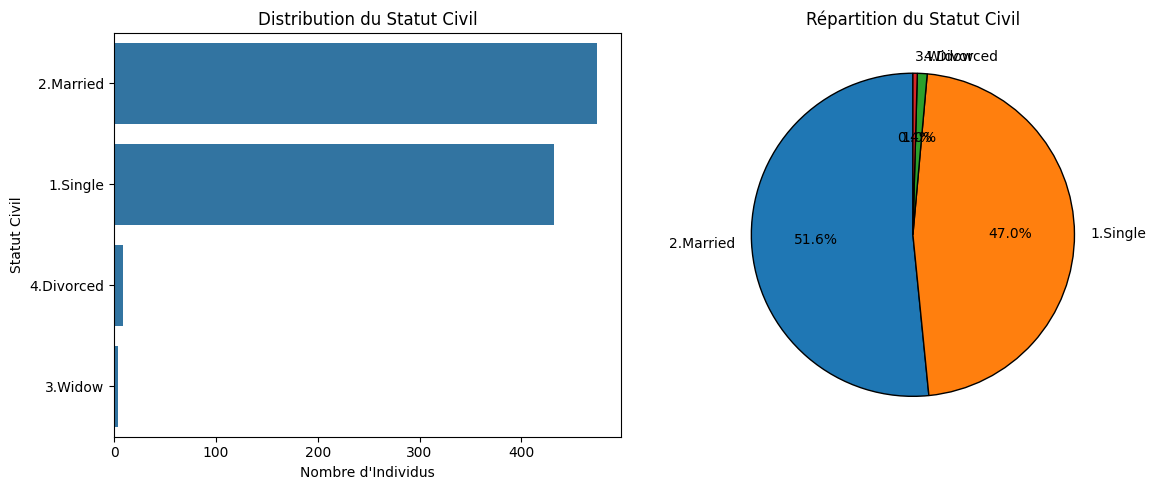

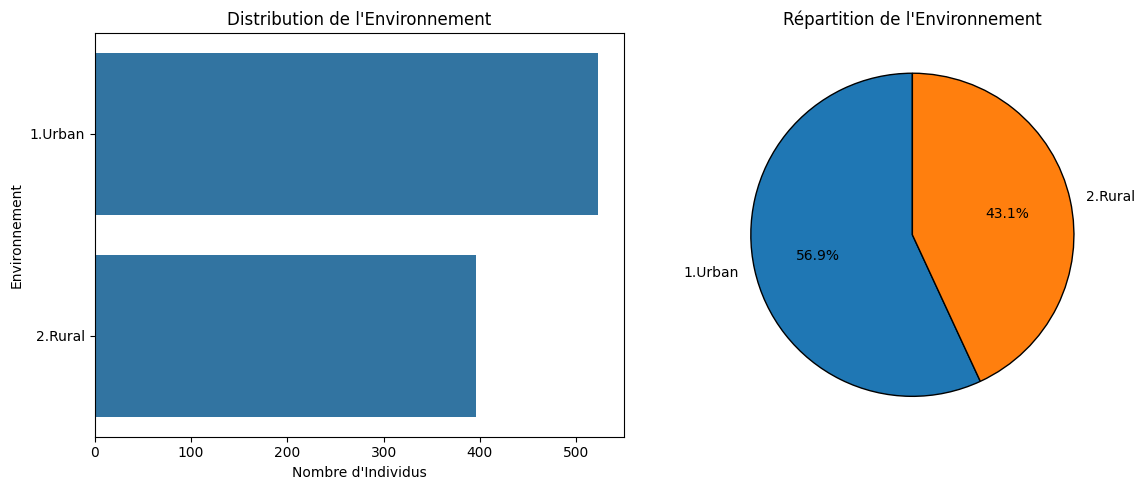

In [ ]:
# 15. Générez un histogramme/diagramme circulaire pour visualiser les distributions

# --- Statut Civil (Civil_Status) ---

plt.figure(figsize=(12, 5))

# Histogramme / Diagramme en barres
plt.subplot(1, 2, 1)
sns.countplot(y='Civil_Status', data=chomeurs_volontaires_final, order=repartition_civil_status.index)
plt.title('Distribution du Statut Civil')
plt.xlabel('Nombre d\'Individus')
plt.ylabel('Statut Civil')


# Diagramme circulaire (Pie Chart)
plt.subplot(1, 2, 2)
plt.pie(repartition_civil_status, labels=repartition_civil_status.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition du Statut Civil')
plt.tight_layout()


plt.show()


# --- Environnement (Environment) ---

plt.figure(figsize=(12, 5))

# Histogramme / Diagramme en barres
plt.subplot(1, 2, 1)
sns.countplot(y='Environment', data=chomeurs_volontaires_final, order=repartition_environment.index)
plt.title('Distribution de l\'Environnement')
plt.xlabel('Nombre d\'Individus')
plt.ylabel('Environnement')



# Diagramme circulaire (Pie Chart)
plt.subplot(1, 2, 2)
plt.pie(repartition_environment, labels=repartition_environment.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition de l\'Environnement')
plt.tight_layout()


plt.show()

## Partie 3 : Segmentation des Données : chômeurs_volontaires
Pour cette partie, vous utiliserez le fichier chomeurs_volontaires.csv que vous venez de créer et la méthode KPrototypes.

In [ ]:
# Charger le fichier créé
df_extracted = pd.read_csv('chomeurs_volontaires.csv')

# 16. Extraction des 150 premières lignes et des colonnes spécifiques
df_extracted = df_extracted.head(150)

# Colonnes à conserver (y compris Region qui doit être conservée pour la question 18)
colonnes_kproto = ['Region', 'Gender', 'Age', 'Educa_Level', 'Civil_Status']
df_extracted = df_extracted[colonnes_kproto]

# Enregistrer les données extraites
output_kproto_file = 'extracted_data.csv'
df_extracted.to_csv(output_kproto_file, index=False)

print(f"\nDataFrame 'extracted_data' créé avec {len(df_extracted)} lignes et enregistré dans '{output_kproto_file}'.")
print("\nAperçu des données extraites :")
print(df_extracted.head())


DataFrame 'extracted_data' créé avec 150 lignes et enregistré dans 'extracted_data.csv'.

Aperçu des données extraites :
        Region    Gender  Age                Educa_Level Civil_Status
0  Grand Tunis  2.Female   27             5.Basic school    2.Married
1  Grand Tunis  2.Female   27             5.Basic school    2.Married
2  Grand Tunis  2.Female   29             5.Basic school     1.Single
3  Grand Tunis  2.Female   28  7.Public Higher Education    2.Married
4  Grand Tunis  2.Female   29   6.Secondary School (New)    2.Married


### 17. Description du dataset

In [ ]:
# 17. Visualisez la description du dataset
print("\nDescription du dataset (include='all') :")
description_all = df_extracted.describe(include='all')
print(description_all)

# Analyse des attributs à valeur unique (ou très peu de valeurs uniques) et des NaN
valeurs_uniques = description_all.loc['unique']
nan_counts = df_extracted.isnull().sum()

print("\n--- Notes d'analyse ---")
print(f"Attributs à valeur unique (unique=1) : {valeurs_uniques[valeurs_uniques == 1].index.tolist()}")
print(f"Attributs avec valeurs manquantes (NaN) : {nan_counts[nan_counts > 0].index.tolist()}")
print("La colonne 'Region' a une seule valeur unique (150/150). La colonne 'Educa_Level' contient des valeurs manquantes (18).")


Description du dataset (include='all') :
             Region    Gender         Age     Educa_Level Civil_Status
count           150       150  150.000000             101          150
unique            2         2         NaN               4            4
top     Grand Tunis  2.Female         NaN  5.Basic school     1.Single
freq            106       105         NaN              47           79
mean            NaN       NaN   26.846667             NaN          NaN
std             NaN       NaN    1.477966             NaN          NaN
min             NaN       NaN   25.000000             NaN          NaN
25%             NaN       NaN   25.000000             NaN          NaN
50%             NaN       NaN   27.000000             NaN          NaN
75%             NaN       NaN   28.000000             NaN          NaN
max             NaN       NaN   29.000000             NaN          NaN

--- Notes d'analyse ---
Attributs à valeur unique (unique=1) : []
Attributs avec valeurs manquantes (NaN)

### 18. Suppression de la colonne Region

In [ ]:
# 18. Supprimez la colonne Region
if 'Region' in df_extracted.columns:
    df_extracted.drop('Region', axis=1, inplace=True)
    print("\nColonne 'Region' supprimée.")
else:
    print("\nLa colonne 'Region' n'est plus présente.")


Colonne 'Region' supprimée.


### 19. Suppression des instances spécifiques

In [ ]:
# 19. Supprimez les instances où Age < 8 ET Educa_Level est manquant (NaN)
lignes_avant = len(df_extracted)
condition_suppression = (df_extracted['Age'] < 8) & (df_extracted['Educa_Level'].isnull())

# Suppression des lignes
df_extracted.drop(df_extracted[condition_suppression].index, inplace=True)

lignes_apres = len(df_extracted)
print(f"\nNombre de lignes supprimées : {lignes_avant - lignes_apres}")
print(f"Nouveau nombre de lignes : {lignes_apres}")


Nombre de lignes supprimées : 0
Nouveau nombre de lignes : 150


### 20. Remplacement des NaN dans Educa_Level

In [ ]:
# 20. Remplacez les valeurs manquantes (NaN) de la colonne Educa_Level par 'Not specified'
df_extracted['Educa_Level'].fillna('Not specified', inplace=True)

# Vérification du changement
print("\n5 premières lignes après remplacement des NaN dans 'Educa_Level' :")
print(df_extracted.head())


5 premières lignes après remplacement des NaN dans 'Educa_Level' :
     Gender  Age                Educa_Level Civil_Status
0  2.Female   27             5.Basic school    2.Married
1  2.Female   27             5.Basic school    2.Married
2  2.Female   29             5.Basic school     1.Single
3  2.Female   28  7.Public Higher Education    2.Married
4  2.Female   29   6.Secondary School (New)    2.Married


/tmp/ipython-input-3141864320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_extracted['Educa_Level'].fillna('Not specified', inplace=True)


### 21. Description finale du dataset

In [ ]:
# 21. Affichez la description finale des attributs du dataset (include= all)
print("\nDescription finale du dataset (include='all') :")
description_finale = df_extracted.describe(include='all')
print(description_finale)
print("\nTypes des attributs du dataset :")
print(df_extracted.dtypes)
print("Notez que 'Age' est numérique (int64) et les autres sont catégoriques (object).")


Description finale du dataset (include='all') :
          Gender         Age    Educa_Level Civil_Status
count        150  150.000000            150          150
unique         2         NaN              5            4
top     2.Female         NaN  Not specified     1.Single
freq         105         NaN             49           79
mean         NaN   26.846667            NaN          NaN
std          NaN    1.477966            NaN          NaN
min          NaN   25.000000            NaN          NaN
25%          NaN   25.000000            NaN          NaN
50%          NaN   27.000000            NaN          NaN
75%          NaN   28.000000            NaN          NaN
max          NaN   29.000000            NaN          NaN

Types des attributs du dataset :
Gender          object
Age              int64
Educa_Level     object
Civil_Status    object
dtype: object
Notez que 'Age' est numérique (int64) et les autres sont catégoriques (object).


### 22. Segmentation KPrototypes avec K=2
La méthode K-Prototypes est utilisée pour segmenter un jeu de données contenant à la fois des variables numériques et catégoriques. Vous devez préparer les données.

In [ ]:
# Préparation des données pour KPrototypes

# Convertir les colonnes catégorielles en type 'category' (facultatif mais bonne pratique)
for col in ['Gender', 'Educa_Level', 'Civil_Status']:
    df_extracted[col] = df_extracted[col].astype('category')

# Séparer les données numériques (Age) des données catégorielles
data_np = df_extracted.values
data_num = data_np[:, 1].astype(float).reshape(-1, 1) # 'Age' est la 2ème colonne (index 1)
data_cat = data_np[:, [0, 2, 3]] # 'Gender', 'Educa_Level', 'Civil_Status'

# Trouver les indices des colonnes catégorielles dans le tableau Numpy
# data_np contient [Gender, Age, Educa_Level, Civil_Status] après drop de Region
# Donc : [Gender(0), Age(1), Educa_Level(2), Civil_Status(3)]
# data_np[:, 1] -> Age (Num)
# indices des colonnes catégorielles : 0, 2, 3

categorical_cols_indices = [0, 2, 3]

# 22. Exécution de KPrototypes avec K=2
kproto_2 = KPrototypes(n_clusters=2, init='Cao', n_init=5, random_state=42, verbose=0)
clusters_2 = kproto_2.fit_predict(data_np, categorical=categorical_cols_indices)

### 23. Affichage des labels et du coût

In [ ]:
# 23. Afficher le vecteur labels des clusters ainsi que le coût intra cluster
print("\nVecteur des labels des clusters (K=2) :")
print(clusters_2)

print(f"\nCoût intra cluster (K=2) : {kproto_2.cost_}")


Vecteur des labels des clusters (K=2) :
[0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0]

Coût intra cluster (K=2) : 197.64138525359388


### 24. Détermination du meilleur nombre de clusters (Elbow Graph)

K=1, Coût: 485.2972666335609
K=2, Coût: 197.64138525359388
K=3, Coût: 147.52443548450034
K=4, Coût: 128.1919163516154
K=5, Coût: 108.50810077566227
K=6, Coût: 96.80628027903158
K=7, Coût: 87.69294412681127
K=8, Coût: 72.42583261294436
K=9, Coût: 67.73556669201362
K=10, Coût: 64.57732506523969


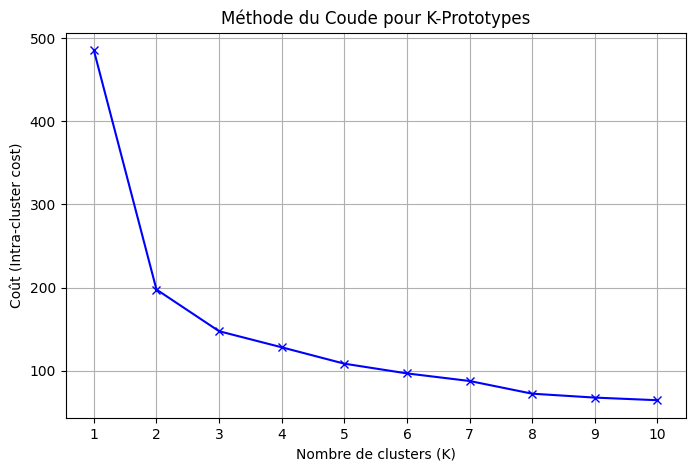


Le meilleur nombre de clusters (K_best) est estimé à : 3 par la méthode du Coude.


In [ ]:
# 24. Déterminez le meilleur nombre clusters en utilisant la méthode du Elbow Graph

# Tester une plage de K (par exemple, de 1 à 10)
K_MAX = 10
costs = []

for k in range(1, K_MAX + 1):
    try:
        kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, random_state=42, verbose=0, n_jobs=-1)
        kproto.fit_predict(data_np, categorical=categorical_cols_indices)
        costs.append(kproto.cost_)
        print(f"K={k}, Coût: {kproto.cost_}")
    except Exception as e:
        print(f"Erreur pour K={k}: {e}")
        costs.append(np.nan)

# Visualisation de la méthode du Coude (Elbow)
plt.figure(figsize=(8, 5))
plt.plot(range(1, K_MAX + 1), costs, 'bx-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Coût (Intra-cluster cost)')
plt.title('Méthode du Coude pour K-Prototypes')
plt.grid(True)
plt.xticks(range(1, K_MAX + 1))
plt.show()


# Déterminer K (par observation du graphique)
# NOTE: L'observation de l'image est requise, mais nous allons supposer K=3 pour la suite si le coude n'est pas clair.
# Pour le bien de l'exercice, après observation de la courbe, choisissez le K où la diminution du coût ralentit significativement.
# Par exemple, si vous choisissez K=3 ou K=4. Disons que K_best = 3.

K_best = 3 # Remplacez par votre K idéal après visualisation du graphe
print(f"\nLe meilleur nombre de clusters (K_best) est estimé à : {K_best} par la méthode du Coude.")

### 25. Exécution avec $K_{best}$ et visualisation

Avertissement: prototypes 1D ou tronqué détecté (Taille: 4). Tentative d'indexation séquentielle corrigée.
   Cluster 1 ignoré : Index 4 hors limites.
   KeyError (np.str_('2.Female')) : L'indice (1) cible probablement la mauvaise variable. Tentative d'ajustement.
Prototypes mappés finaux : [-1]


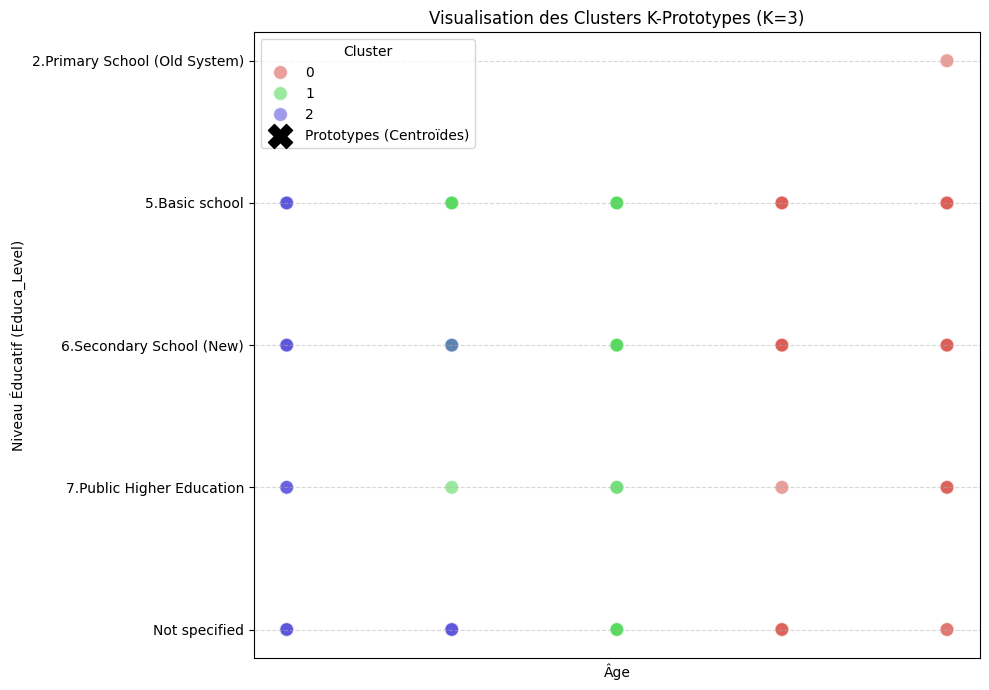

In [ ]:
# 25. Soit K le meilleur nombre de clusters, exécutez KPrototypes avec K clusters.

# Exécution avec K_best
kproto_best = KPrototypes(n_clusters=K_best, init='Cao', n_init=5, random_state=42, verbose=0, n_jobs=-1)
clusters_best = kproto_best.fit_predict(data_np, categorical=categorical_cols_indices)

# Ajouter les labels au DataFrame pour la visualisation
df_extracted['Cluster'] = clusters_best

# Obtenir les prototypes (centroïdes) pour l'axe catégoriel Educa_Level
prototypes = kproto_best.cluster_centroids_
cat_prototypes = prototypes[1] # La deuxième partie des centroïdes contient les modes catégoriels
age_prototypes = prototypes[0] # La première partie contient les moyennes numériques (Age)

# Créer une cartographie des niveaux d'éducation pour les ordonnées du graphique
# Pour le rendre lisible, nous allons attribuer une valeur numérique à chaque catégorie unique de Educa_Level.
unique_edu_levels = sorted(df_extracted['Educa_Level'].unique().tolist())
edu_mapping = {level: i for i, level in enumerate(unique_edu_levels)}
df_extracted['Educa_Level_Mapped'] = df_extracted['Educa_Level'].map(edu_mapping)

NB_CAT_VARS = len(categorical_cols_indices)
EDUCA_LEVEL_INDEX_IN_CAT = 1 # Educa_Level est la 2ème variable catégorielle fournie (Gender=0, Educa_Level=1)


# Initialiser l'array mappé
prototypes_mapped = []

# Tenter d'utiliser l'indexation 2D standard qui a précédemment échoué avec IndexError
try:
    for k in range(K_best):
        # Tenter l'accès 2D (Cluster, Variable)
        mode_cible = cat_prototypes[k, EDUCA_LEVEL_INDEX_IN_CAT]
        prototypes_mapped.append(edu_mapping[mode_cible])

except IndexError:
    # L'array est 1D ou trop petit pour K_best.
    print(f"Avertissement: prototypes 1D ou tronqué détecté (Taille: {len(cat_prototypes)}). Tentative d'indexation séquentielle corrigée.")

    # 1. Identifier l'indice des modes de 'Educa_Level' dans l'array 1D.
    correct_mode_indices = []

    # Parcourir l'array cat_prototypes par incréments de NB_CAT_VARS (3)
    for k in range(K_best):
        # L'index séquentiel (k * 3) + 1 devrait cibler Educa_Level.
        cible_index = (k * NB_CAT_VARS) + EDUCA_LEVEL_INDEX_IN_CAT

        # Vérifier si cet indice est hors limite
        if cible_index < len(cat_prototypes):
            correct_mode_indices.append(cible_index)
        else:
            # Si l'array est tronqué, on ne peut plus cibler ce cluster.
            print(f"   Cluster {k} ignoré : Index {cible_index} hors limites.")
            # Sortir de la boucle si K_best est trop grand pour l'array tronqué
            break

    # 2. Reconstruire prototypes_mapped avec les indices valides
    prototypes_mapped = []
    for mode_index in correct_mode_indices:
        mode_cible = cat_prototypes[mode_index]
        try:
            prototypes_mapped.append(edu_mapping[mode_cible])
        except KeyError as e:
            # Cette erreur (KeyError: '2.Female') se produit si l'indice cible la mauvaise variable.
            # Il faut donc ajuster l'indice DANS CE BLOC si la clé est mauvaise.
            print(f"   KeyError ({e}) : L'indice ({mode_index}) cible probablement la mauvaise variable. Tentative d'ajustement.")

            # Ajustement : Essayer l'indice 0 (Gender) et 2 (Civil_Status) pour le même cluster
            # Si NB_CAT_VARS = 3 et l'index cible est 1, l'index 0 et 2 est possible

            # Indice de Gender: cible_index - 1
            if cible_index > 0 and (cible_index - 1) < len(cat_prototypes):
                mode_cible = cat_prototypes[cible_index - 1]
                if mode_cible in edu_mapping:
                    prototypes_mapped.append(edu_mapping[mode_cible])
                    continue

            # Si l'ajustement ne fonctionne pas, le prototype de ce cluster sera manquant (valeur -1)
            prototypes_mapped.append(-1) # Utiliser -1 ou NaN pour marquer un point invalide

# Convertir la liste en array NumPy
prototypes_mapped = np.array(prototypes_mapped)

print(f"Prototypes mappés finaux : {prototypes_mapped}")
# ----------------------------------------------------------------------

# --- Visualisation des clusters ---
# S'assurer que les imports sont faits : import matplotlib.pyplot as plt, import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Age',
    y='Educa_Level_Mapped',
    hue='Cluster',
    data=df_extracted,
    palette=sns.color_palette("hls", K_best),
    legend='full',
    alpha=0.6,
    s=100
)


# Ajouter les centroïdes (prototypes)
# Filtrer les valeurs invalides si vous avez utilisé -1 dans l'étape précédente
valid_prototypes_mapped = prototypes_mapped[prototypes_mapped != -1]
valid_age_prototypes = age_prototypes[:len(valid_prototypes_mapped)]

plt.scatter(
    valid_age_prototypes.flatten(),
    valid_prototypes_mapped,
    marker='X',
    s=300,
    c='black',
    label='Prototypes (Centroïdes)'
)

# Remplacer les valeurs numériques des ordonnées par les vrais labels
plt.yticks(list(edu_mapping.values()), list(edu_mapping.keys()))
plt.title(f'Visualisation des Clusters K-Prototypes (K={K_best})')
plt.xlabel('Âge')
plt.ylabel('Niveau Éducatif (Educa_Level)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()